# Import Dataset

In [60]:
import pandas as pd
import numpy as np
from os import path

data_path = path.join('..','dataset','financialData.csv')
data = pd.read_csv(data_path)
print(data.head()) 

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# Data Preprocessing

## import libraries

In [61]:
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import preprocessing
plt.style.use('ggplot')

## Check for Null values

In [62]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## See distribution of positive vs negative target classes (isFraud (1) vs nortFraud (0))

In [63]:
All = data.shape[0]
# print(All)

In [64]:
fraud = data[data['isFraud'] == 1]
notFraud = data[data['isFraud'] == 0]

x = len(fraud)/All
y = len(notFraud)/All

print(f"fraud rate is {x*100}%")
print(f"notFraud rate is {y*100}%")

fraud rate is 0.12908204481801522%
notFraud rate is 99.87091795518198%


0    6354407
1       8213
Name: isFraud, dtype: int64


([<matplotlib.axis.XTick at 0x7f8be0fa5310>,
 [Text(0, 0, 'notFraud'), Text(1, 0, 'Fraud')])

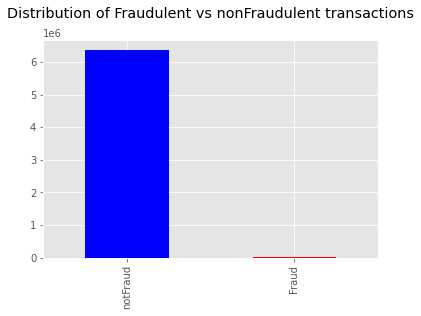

In [65]:
# Plotting the results above
labels = ['notFraud', 'fraud']
classes = pd.value_counts(data['isFraud'], sort = True)
print(classes)
classes.plot.bar(color = ['blue','red'],subplots=True)
plt.title('Distribution of Fraudulent vs nonFraudulent transactions\n')
plt.xticks(np.arange(2),('notFraud','Fraud'))

## Plotting distribution of features

In [66]:
# amount = data['amount']
# # print(amount.name)
# plt.figure(figsize=(15,8))
# sns.distplot(amount)


In [67]:
# oldbalanceOrg = data['oldbalanceOrg']
# plt.figure(figsize=(15,8))
# sns.distplot(oldbalanceOrg)

In [68]:
# newbalanceOrig = data['newbalanceOrig']
# plt.figure(figsize=(15,8))
# sns.distplot(newbalanceOrig)

## See distribution of transaction types

In [69]:
data_type = data["type"].value_counts()
transactions = data_type.index
quantity = data_type.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

## See feature correlation with target column (isFraud)

In [70]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


## Transforming categorical feature (type) to numeric representation 

In [71]:
# ONE HOT ENCODING
# generate binary balues using get_dummies
dum_df = pd.get_dummies(data['type'],prefix='transactionType',prefix_sep=':')
dum_df.head()
# replacing the type column with the columns generated above
del data['type']
data.head()
data = data.join(dum_df)

In [72]:
# change isFraud to text
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transactionType:CASH_IN,transactionType:CASH_OUT,transactionType:DEBIT,transactionType:PAYMENT,transactionType:TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0,0,0,0,1,0


# Splitting the data

In [73]:
# import libraries
from sklearn.model_selection import train_test_split
# select the features that will be used by the model by dropping some of the unwanted columns
labels = ['step','nameOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud']
dataForModel = data.drop(columns=labels)
dataForModel.head()

,amount,oldbalanceOrg,newbalanceOrig,isFraud,transactionType:CASH_IN,transactionType:CASH_OUT,transactionType:DEBIT,transactionType:PAYMENT,transactionType:TRANSFER
0,9839.64,170136.0,160296.36,No Fraud,0,0,0,1,0
1,1864.28,21249.0,19384.72,No Fraud,0,0,0,1,0
2,181.00,181.0,0.00,Fraud,0,0,0,0,1
3,181.00,181.0,0.00,Fraud,0,1,0,0,0
4,11668.14,41554.0,29885.86,No Fraud,0,0,0,1,0


In [74]:
# move target column to the end of dataframe
target = dataForModel.pop('isFraud')
dataForModel.insert(len(dataForModel.columns),target.name,target)
dataForModel.head()

,amount,oldbalanceOrg,newbalanceOrig,transactionType:CASH_IN,transactionType:CASH_OUT,transactionType:DEBIT,transactionType:PAYMENT,transactionType:TRANSFER,isFraud
0,9839.64,170136.0,160296.36,0,0,0,1,0,No Fraud
1,1864.28,21249.0,19384.72,0,0,0,1,0,No Fraud
2,181.00,181.0,0.00,0,0,0,0,1,Fraud
3,181.00,181.0,0.00,0,1,0,0,0,Fraud
4,11668.14,41554.0,29885.86,0,0,0,1,0,No Fraud


# Undersampling

In [75]:
# update fraud and notFraud variables to match dataForModel dataFrame
fraud = dataForModel[dataForModel['isFraud']=='Fraud']
notFraud = dataForModel[dataForModel['isFraud']=='No Fraud']

In [76]:
# get random samples of majority class (notFraud) using DataFrame.sample
# classes[1] is an int with the number of Fraud positive samples form the dataset
notFraud_under = notFraud.sample(classes[1])
dataForModel = pd.concat([fraud, notFraud_under],axis=0)

In [77]:
print('Random under-sampling:')
print(dataForModel['isFraud'].value_counts())

Random under-sampling:
Fraud       8213
No Fraud    8213
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'Target class count after sampling\n'}>

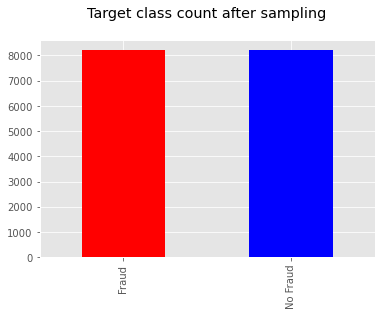

In [78]:
dataForModel['isFraud'].value_counts().plot(kind='bar', title = 'Target class count after sampling\n', color=['red','blue'])

Now we have a balanced dataset with respect to the target class 'isFraud', and at the same time we managed to reduce the number of samples which helps reduce our time overhead

In [ ]:
X_under = dataForModel.iloc[:, :-1].values
y_under = dataForModel.iloc[:, -1].values
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size = 0.2, random_state = 1)

In [ ]:
# first I will normalize the non-categorical features
normalizer = preprocessing.Normalizer()
X_train_under[:,0:3] = normalizer.fit_transform(X_train_under[:,0:3])
X_test_under[:,0:3] = normalizer.transform(X_test_under[:,0:3])